In [2]:
import pandas as pd

In [7]:
data = []
template_dict = {
    "input size":0,
    "proc number":0,
    "duration (ns)":0,
    "throughput (gb/s)":0
}

with open("./stats.txt", 'r') as f:
    for line in f.readlines():
        if (line.find(":")) == -1:
            continue
        key, val = line.split(":")
        key = key.strip()
        if (key == "input size"):
            data.append({})
        val = float(val.strip())
        # print(key, val)
        data[-1][key] = val
# print(data)
df = pd.DataFrame(data)
print(df)

     input size  proc number  duration (ns)  throughput (gb/s)
0          10.0          1.0   2.663200e+04           0.002798
1          50.0          1.0   7.058200e+04           0.005278
2         100.0          1.0   2.452810e+05           0.003038
3         200.0          1.0   9.568630e+05           0.001557
4         500.0          1.0   5.849499e+06           0.000637
..          ...          ...            ...                ...
971      8000.0         14.0   1.220777e+08           0.000488
972     10000.0         14.0   1.883605e+08           0.000396
973     20000.0         14.0   7.383272e+08           0.000202
974     25000.0         14.0   1.149056e+09           0.000162
975     50000.0         14.0   4.560588e+09           0.000082

[976 rows x 4 columns]


In [4]:
import matplotlib.pyplot as plt

In [8]:
def draw(draw_proc_num,intput_size_max=50000):
    draw_df = df.loc[lambda x: x['input size'] <= intput_size_max]
    fig, ax = plt.subplots()
    # print(df.loc[lambda x: x['input size'] <= input_size_max])
    for key, grp in draw_df.groupby(['proc number']):
        # print(key)
        # print(grp)
        if (key in draw_proc_num):
            label = "proc number: " + str(int(key))
            ax = grp.plot(ax=ax, kind='line', x="input size", y="duration (ns)", label=label)
    plt.legend(loc='best')
    ax.set_ylabel("duration (ns)")
    plt.show()

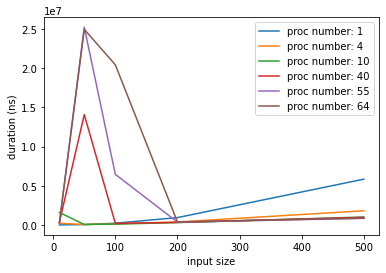

In [9]:
proc_range = [1, 4, 10, 40, 55, 64]
draw(proc_range,500)

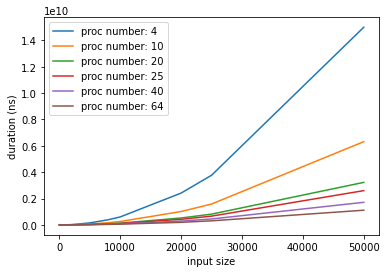

In [98]:
proc_range = [4, 10, 20, 25, 40, 50, 64]
draw(proc_range)